# Significance of SST gradient and Eddy Kinetic Energy trends

This Jupyter notebook reproduces the Extended Data Figure 1 of the manuscript "Global changes in oceanic mesoscale currents over the satellite altimetry record". 

In [1]:
# Import libraries
import xarray as xr
import cmocean as cm
import cartopy.crs as ccrs

import pylab as plt
import numpy as np
# Inline plotting
%matplotlib inline

In [2]:
import cartopy.crs as ccrs
# Import plot utilities.
from plot_utils import truncate_colormap, ccrs_land, vectorize, add_patches

### Load trends

In [3]:
eke_trend=xr.open_dataset('../../datasets/EKE_trends.nc')

In [4]:
ssh_trend = xr.open_dataset('../../datasets/SSH_trends.nc')

In [5]:
sst_trend = xr.open_dataset('../../datasets/SST_trends.nc')

In [6]:
sst_grad_trend = xr.open_dataset('../../datasets/SST_grads_trends.nc')

Convert trends from "per day" to "per decade" and select within the 60°S - 60°N band 

In [7]:
eke_t=eke_trend.trend.where(abs(eke_trend.y)<60)*10*365
eke_signi=eke_trend.signif.where(abs(eke_trend.y)<60)

In [8]:
ssh_t=ssh_trend.trend.where(abs(eke_trend.y)<60)*10*365
ssh_signi=ssh_trend.signif.where(abs(eke_trend.y)<60)

In [9]:
sst_t=sst_trend.trend.where(abs(eke_trend.y)<60)*10*365
sst_signi=sst_trend.signif.where(abs(eke_trend.y)<60)

In [10]:
sst_g_t=sst_grad_trend.trend.where(abs(eke_trend.y)<60)*10*365
sst_g_signi=sst_grad_trend.signif.where(abs(eke_trend.y)<60)

### Plot trends and significance 

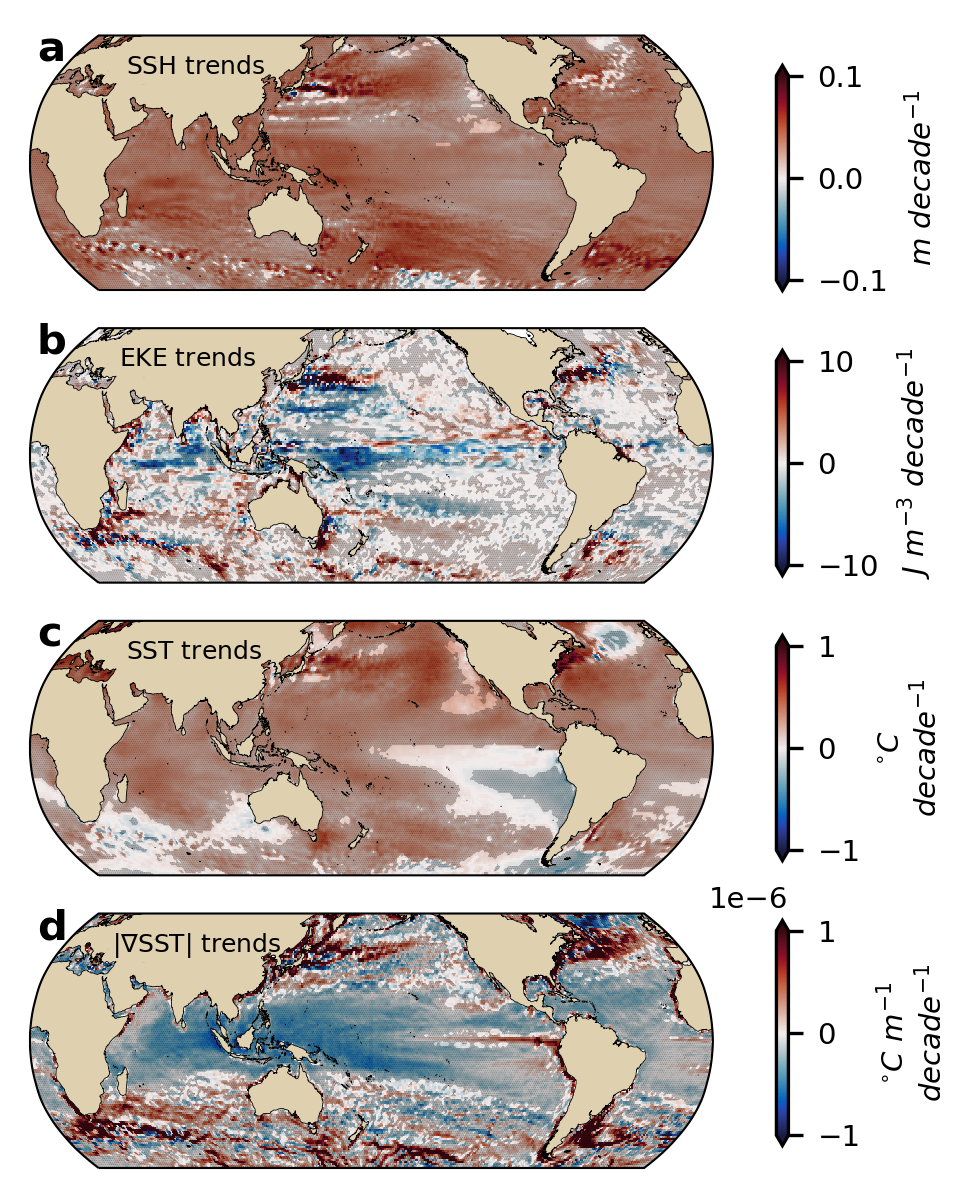

In [11]:
plt.rcParams['xtick.major.pad']='1'

fig = plt.figure(figsize=(4, 5),dpi=300)

plt.rc('hatch', color='k', linewidth=0.01)

##################################################################################################
## Subplot##
##################################################################################################

ax1=fig.add_subplot(4, 1, 1,projection= ccrs.Robinson(central_longitude=180))
clm1= ssh_t.plot(vmin=-0.1,vmax=0.1,transform=ccrs.PlateCarree(),cmap=cm.cm.balance, add_colorbar=False, rasterized=True)
ax1.set_extent([0.1,359.99,-60, 60], crs=ccrs.PlateCarree())
ax1.add_feature(ccrs_land, zorder=2)
add_patches(ax1)
cs=ssh_signi.where(ssh_signi==1).plot.contourf(transform=ccrs.PlateCarree(), colors='none',alpha=0.2,hatches=['...'*8, '/'], add_colorbar=False)
vectorize(cs)

ax2=fig.add_subplot(4, 1, 2,projection= ccrs.Robinson(central_longitude=180))
clm2= eke_t.plot(vmin=-10,vmax=10,transform=ccrs.PlateCarree(),cmap=cm.cm.balance, add_colorbar=False, rasterized=True)
ax2.set_extent([0.1,359.99,-60, 60], crs=ccrs.PlateCarree())
ax2.add_feature(ccrs_land, zorder=2)
add_patches(ax2)

cs = eke_signi.where(eke_signi==1).plot.contourf(transform=ccrs.PlateCarree(), colors='none',alpha=0.2,hatches=['...'*8, '/'], add_colorbar=False)
vectorize(cs)


ax3=fig.add_subplot(4, 1, 3,projection= ccrs.Robinson(central_longitude=180))
clm3=sst_t.plot(vmin=-1,vmax=1,transform=ccrs.PlateCarree(),cmap=cm.cm.balance, add_colorbar=False, rasterized=True)
ax3.set_extent([0.1,359.99,-60, 60], crs=ccrs.PlateCarree())
ax3.add_feature(ccrs_land, zorder=2)
add_patches(ax3)

cs = sst_signi.where(sst_signi==1).plot.contourf(transform=ccrs.PlateCarree(), colors='none',alpha=0.2,hatches=['...'*8, '/'], add_colorbar=False)
vectorize(cs)

ax4=fig.add_subplot(4, 1, 4,projection= ccrs.Robinson(central_longitude=180))
clm4=sst_g_t.plot(vmin=-1e-6,vmax=1e-6,transform=ccrs.PlateCarree(),cmap=cm.cm.balance, add_colorbar=False, rasterized=True)
ax4.set_extent([0.1,359.99,-60, 60], crs=ccrs.PlateCarree())
ax4.add_feature(ccrs_land, zorder=2)
add_patches(ax4)

cs = sst_g_signi.where(sst_g_signi==1).plot.contourf(transform=ccrs.PlateCarree(), colors='none',alpha=0.2,hatches=['...'*8, '/'], add_colorbar=False)
vectorize(cs)

ax1.spines['geo'].set_linewidth(0.5)
ax2.spines['geo'].set_linewidth(0.5)
ax3.spines['geo'].set_linewidth(0.5)
ax4.spines['geo'].set_linewidth(0.5)

cbar_ax = fig.add_axes([0.85, 0.71, 0.01, 0.15])
cbar=plt.colorbar(clm1, cax=cbar_ax,orientation='vertical',extend='both')
cbar.ax.xaxis.get_offset_text().set_position((0.5,0.5))
cbar.set_label( r'$m\  decade^{-1}$', rotation=90, fontsize=7)
cbar.ax.tick_params(labelsize=7)
cbar.ax.yaxis.get_offset_text().set(size=7)

cbar_ax = fig.add_axes([0.85, 0.52, 0.01, 0.15])
cbar=plt.colorbar(clm2, cax=cbar_ax,orientation='vertical',extend='both')
cbar.set_label(r'$J\ m^{-3}\  decade^{-1}$', rotation=90, fontsize=7)
cbar.ax.tick_params(labelsize=7)
cbar.ax.yaxis.get_offset_text().set(size=7)

cbar_ax = fig.add_axes([0.85, 0.33, 0.01, 0.15])
cbar=plt.colorbar(clm3, cax=cbar_ax,orientation='vertical',extend='both')
cbar.set_label(r'$^{\circ}C$' '\n' r'$decade^{-1}$', rotation=90, fontsize=7)
cbar.ax.tick_params(labelsize=7)
cbar.ax.yaxis.get_offset_text().set(size=7)

cbar_ax = fig.add_axes([0.85, 0.14, 0.01, 0.15])
cbar=plt.colorbar(clm4, cax=cbar_ax,orientation='vertical',extend='both')
cbar.set_label(r'$^{\circ}C\ m^{-1}$' '\n' r'$decade^{-1}$', rotation=90, fontsize=7)
cbar.ax.tick_params(labelsize=7)
cbar.ax.yaxis.get_offset_text().set(size=7)

ax1.text(0.01,0.9,'a',fontweight='bold',fontsize=10,transform=ax1.transAxes)
ax2.text(0.01,0.9,'b',fontweight='bold',fontsize=10,transform=ax2.transAxes)
ax3.text(0.01,0.9,'c',fontweight='bold',fontsize=10,transform=ax3.transAxes)
ax4.text(0.01,0.9,'d',fontweight='bold',fontsize=10,transform=ax4.transAxes)

ax1.text(0.14,0.85,r'$\mathrm{SSH}$ trends',fontsize=6,transform=ax1.transAxes)
ax2.text(0.13,0.85,r'$\mathrm{EKE}$ trends',fontsize=6,transform=ax2.transAxes)
ax3.text(0.14,0.85,r'$\mathrm{SST}$ trends',fontsize=6,transform=ax3.transAxes)
ax4.text(0.12,0.85,r'$|\nabla \mathrm{SST}|$ trends',fontsize=6,transform=ax4.transAxes)

plt.subplots_adjust(hspace = .15, wspace = .04)

plt.savefig('../../LaTeX/figures/global_SST_SST_grad_SSH_trends_signif.pdf',dpi=300,bbox_inches='tight')

**Extended Data Figure 1 | Regions of statistically significant trends of (a) sea surface height; (b) surface eddy kinetic energy; (c) sea surface temperature; (d) sea surface  temperature  gradient  magnitude.** As  per  Figs.   1b,  1f,  2b,  and  2f  in  main manuscript, but showing in gray stippling regions that are statistically significant above the 95% confidence level.
